In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("/Users/kent/git/courses/python_ML2/session4_kaggle/house_prices_advanced_regression_techniques/train.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Drop Id
train = train.drop('Id', 1)

In [6]:
# train.drop(['MiscVal'], axis = 1, inplace = True)
#1. Convert NA into 'No' Categorical values
meaningfulNA = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
train[meaningfulNA] = train[meaningfulNA].fillna('No')

In [7]:
# do shuffle
train = train.sample(frac=1,random_state=1)


In [8]:
intVar = train.select_dtypes(include = ['int']).columns.tolist()
floatVar = train.select_dtypes(include = ['float']).columns.tolist()
objectVar = train.select_dtypes(include = ['object']).columns.tolist()


print("intVar =>",intVar,"\n")
print("floatVar =>",floatVar,"\n")
print("objectVar =>",objectVar,"\n")







intVar => ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'] 

floatVar => ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'] 

objectVar => ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', '

# 進行資料編碼

In [9]:
cate_data = train[objectVar]
cate_data.values

array([['RL', 'Pave', 'No', ..., 'No', 'WD', 'Normal'],
       ['RL', 'Pave', 'No', ..., 'No', 'WD', 'Normal'],
       ['RL', 'Pave', 'No', ..., 'No', 'WD', 'Normal'],
       ..., 
       ['RM', 'Pave', 'No', ..., 'No', 'WD', 'Normal'],
       ['RM', 'Pave', 'No', ..., 'No', 'WD', 'Normal'],
       ['C (all)', 'Grvl', 'No', ..., 'Shed', 'ConLD', 'Normal']], dtype=object)

In [10]:


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
Xstr = cate_data.values.astype(dtype="str")
# transform to integer
Xint = LabelEncoder().fit_transform(Xstr.ravel()).reshape(*Xstr.shape)
# transform to binary
Xbin = OneHotEncoder().fit_transform(Xint).toarray()



In [11]:
X_cate = Xbin
X_cate

array([[ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 1.,  0.,  0., ...,  0.,  1.,  0.]])

In [12]:
from sklearn.preprocessing import StandardScaler
stds = StandardScaler()
X_float = train[floatVar]
X_int = train[intVar[:-1]]

print(X_float.shape)
print(X_int.shape)

(1460, 3)
(1460, 33)


In [13]:
X_real = np.column_stack((X_float,X_int))
X_real = np.nan_to_num(X_real)

X_real_scaled = stds.fit_transform(X_real)
X_real_scaled.shape

(1460, 36)

In [14]:
X_all = np.column_stack((X_real_scaled,X_cate))
X_all.shape

(1460, 303)

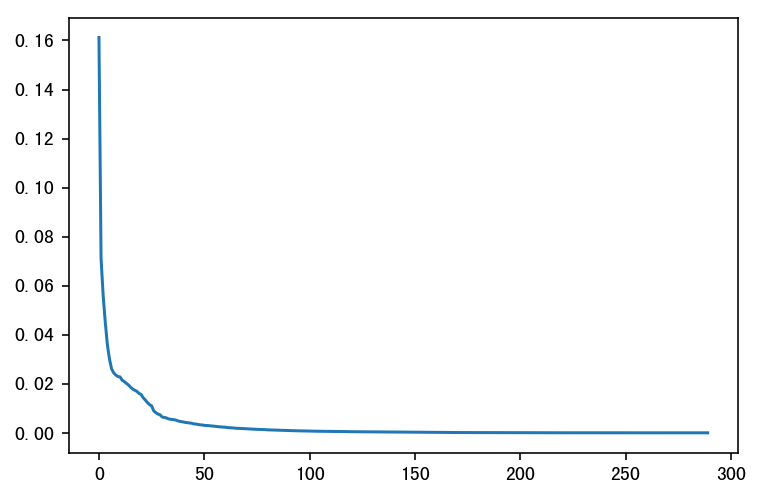

In [15]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=290,whiten=True)
X_train_pca = pca.fit_transform(X_all)

plt.plot(pca.explained_variance_ratio_)


In [16]:
Y = np.log(train['SalePrice'])

stds_y = StandardScaler()
Y_scaled = stds_y.fit_transform(Y.reshape(-1, 1))
Y_scaled

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


array([[ 0.82211841],
       [ 0.18501578],
       [-0.78202557],
       ..., 
       [-0.68143822],
       [-1.55781006],
       [-1.80771167]])

In [ ]:
from sklearn.linear_model import LinearRegression,SGDRegressor,BayesianRidge
from sklearn import metrics
lr = SGDRegressor(loss='squared_loss', 
                  penalty='l1', alpha=0.005, l1_ratio=0.15, 
                  fit_intercept=True, max_iter=None, tol=None, 
                  shuffle=True, verbose=0, epsilon=0.1, random_state=1, learning_rate='invscaling', 
                  eta0=0.01, power_t=0.25, warm_start=False, average=False, n_iter=None)


# lr = BayesianRidge(n_iter=300, tol=0.001, alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, 
#                    lambda_2=1e-06, compute_score=False, fit_intercept=True, normalize=True, 
#                    copy_X=True, verbose=False)

lr.fit(X_train_pca[:-100],Y_scaled[:-100])

In [20]:
# 拿 training 直接驗證
predict_y = lr.predict(X_train_pca[-100:])
metrics.mean_absolute_error(np.exp(Y[-100:]),np.exp(stds_y.inverse_transform(predict_y)))

12627.510493902691

# Use NN

In [ ]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras import regularizers

from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
from keras import initializers
from keras import optimizers

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

Y = train['SalePrice']
stds_y = MinMaxScaler(feature_range=(0, 1), copy=True)
Y_scaled = stds_y.fit_transform(Y.reshape(-1, 1))
Y_scaled

In [ ]:
input_x = Input(shape=(X_all.shape[1],))

h1 = Dense(64,activation='linear',
               kernel_regularizer=regularizers.l1(0.005),)(input_x)

dr1 = Dropout(0.1)(h1)

h2 = Dense(64,activation='linear',
               kernel_regularizer=regularizers.l1(0.005))(dr1)

output = Dense(1,activation='linear',
               kernel_regularizer=regularizers.l1(0.005),)(h2)

model = Model(input_x,output)
model.compile(optimizer=optimizers.Adagrad(),
              loss='mean_squared_error',)
model.summary()

In [ ]:

error = model.fit(X_all[100:],Y[100:],
                  batch_size=8,validation_split=0,
                  validation_steps=None,epochs=100,verbose=1)
    


In [ ]:
plt.plot(error.history['loss'])


In [ ]:
# 拿 training 直接驗證
predict_y = model.predict(X_all[:100])
metrics.mean_absolute_error(Y[:100], predict_y)

# Find Outliner


In [ ]:
diff = Y - model.predict(X_all).reshape([X_all.shape[0]])


diff = diff.abs()
diff.describe()

In [ ]:
plt.plot(diff.sort_values(ascending=False).values)

In [ ]:
# diff.sort_values(ascending=False)[:100].index.tolist()

In [ ]:
# remove outliner
X_all_nout = np.delete(X_all,diff.sort_values(ascending=False)[:100].index.tolist(),0)

In [ ]:
Y_nout = Y.drop(diff.sort_values(ascending=False)[:100].index.tolist())

In [ ]:
#  Re Train without outliner XD

In [ ]:
model = Model(input_x,output)
model.compile(optimizer=optimizers.Adagrad(),
              loss='mean_squared_error',)
model.summary()

In [ ]:
error = model.fit(X_all[100:],Y[100:],
                  batch_size=8,validation_split=0,
                  validation_steps=None,epochs=2000,verbose=1)

In [39]:
plt.plot(error.history['loss'])


NameError: name 'error' is not defined

In [ ]:
# 拿 training 直接驗證
predict_y = model.predict(X_all)
metrics.mean_absolute_error(Y, predict_y)

In [ ]:
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

fig, ax = plt.subplots(figsize=(50, 40))

plt.style.use('ggplot')
plt.plot(predict_y, Y, 'ro')
plt.xlabel('Predictions', fontsize = 30)
plt.ylabel('Reality', fontsize = 30)
plt.title('Predictions x Reality on dataset Test', fontsize = 30)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
plt.show()

# 分析 40 萬為界兩個分佈的區別

In [40]:
train[train['SalePrice']>300000].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,115.000000,106.000000,115.000000,115.000000,115.000000,115.000000,115.000000,114.000000,115.000000,115.000000,...,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.0,115.000000,115.000000,115.000000
mean,46.347826,88.000000,16692.130435,8.495652,5.278261,1997.147826,2002.878261,347.017544,934.400000,26.200000,...,196.573913,88.773913,9.200000,5.434783,20.365217,4.826087,0.0,6.678261,2007.773913,375946.260870
std,26.493310,22.442307,22080.593005,0.872322,0.969245,20.594346,6.691377,284.128974,603.541766,164.611622,...,150.763499,77.620654,43.176545,35.125372,67.146649,51.754017,0.0,2.802091,1.324935,84423.034455
min,20.000000,32.000000,5119.000000,7.000000,2.000000,1892.000000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,2006.000000,301000.000000
25%,20.000000,76.250000,11096.500000,8.000000,5.000000,1996.000000,1999.000000,160.500000,319.000000,0.000000,...,116.500000,45.000000,0.000000,0.000000,0.000000,0.000000,0.0,5.000000,2007.000000,319450.000000
50%,60.000000,86.000000,12474.000000,8.000000,5.000000,2005.000000,2006.000000,304.500000,1150.000000,0.000000,...,192.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.0,7.000000,2008.000000,345000.000000
75%,60.000000,99.750000,14660.500000,9.000000,5.000000,2007.000000,2007.000000,471.250000,1386.500000,0.000000,...,263.000000,119.500000,0.000000,0.000000,0.000000,0.000000,0.0,9.000000,2009.000000,395096.000000
max,120.000000,174.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2188.000000,1474.000000,...,857.000000,502.000000,291.000000,304.000000,410.000000,555.000000,0.0,12.000000,2010.000000,755000.000000


In [41]:
train[train['SalePrice']<=300000].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1345.000000,1095.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1338.000000,1345.000000,1345.000000,...,1345.000000,1345.00000,1345.00000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000
mean,57.799257,68.312329,9988.828253,5.894424,5.600743,1969.055019,1983.325651,82.952915,401.678810,48.289219,...,85.495167,43.05948,23.04461,3.236431,14.607435,2.582156,47.207435,6.291450,2007.819331,164246.190335
std,43.273217,23.755211,7953.193257,1.215907,1.120892,29.867788,20.706771,152.573202,415.400874,160.977604,...,118.968403,63.95080,62.30530,28.775284,54.679591,39.048020,516.742981,2.693929,1.328795,52094.670262
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,57.000000,7314.000000,5.000000,5.000000,1951.000000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,128000.000000
50%,50.000000,67.000000,9196.000000,6.000000,5.000000,1970.000000,1991.000000,0.000000,358.000000,0.000000,...,0.000000,20.00000,0.00000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,156000.000000
75%,70.000000,80.000000,11207.000000,7.000000,6.000000,1998.000000,2003.000000,125.000000,663.000000,0.000000,...,156.000000,62.00000,0.00000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,196000.000000
max,190.000000,313.000000,164660.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,5644.000000,1127.000000,...,736.000000,547.00000,552.00000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,299800.000000
